In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import datetime as dat
import matplotlib as mplt
import datetime as dt
import xgboost as xgb
%matplotlib inline
sns.set()

In [2]:
train_features = pd.read_csv('xgb/train_features_clicks_gonzalo.csv').set_index('ref_hash')
train_labels = pd.read_csv('xgb/train_labels.csv').set_index('device_id').drop(['Unnamed: 0'],axis=1)

train_joined = train_features.join(train_labels, how = 'inner')

train_features = train_joined.iloc[:,:-1]
train_labels = train_joined.iloc[:,-1].to_frame()

In [3]:
test_features = pd.read_csv('xgb/test_features_clicks_gonzalo.csv').set_index('ref_hash')
test_labels = pd.read_csv('xgb/test_labels.csv').set_index('device_id').drop(['Unnamed: 0'],axis=1)

test_joined = test_features.join(test_labels, how = 'inner')

test_features = test_joined.iloc[:,:-1]
test_labels = test_joined.iloc[:,-1].to_frame()

In [4]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [5]:
xg_reg.fit(train_features,train_labels)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [6]:
predicted_labels = xg_reg.predict(test_features)

In [7]:
rmse = np.sqrt(mean_squared_error(test_labels, predicted_labels))
print("RMSE: %f" % (rmse))

RMSE: 67949.965415


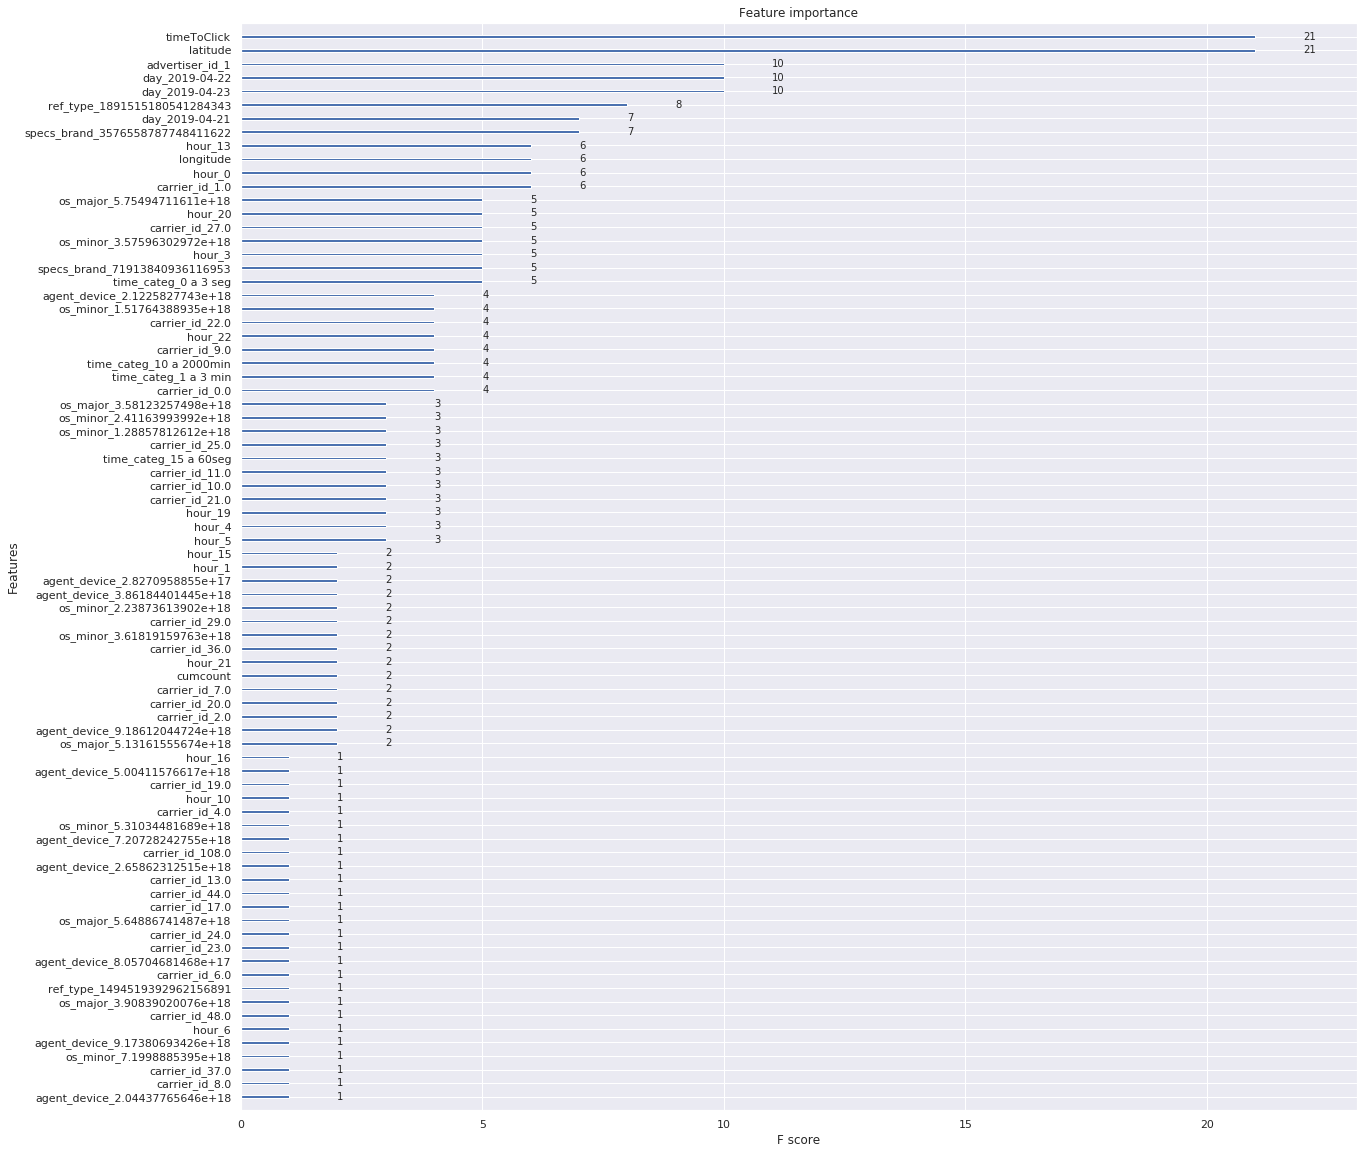

In [10]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 30]
plt.show()